# Regression

In this tutorial we'll compare some models on a regression task. More specifically, the task we'll look into Fish toxicity.
For this investigation, we will use the QSAR fish toxicity dataset. You can read about the dataset in this [paper](https://www.tandfonline.com/doi/full/10.1080/1062936X.2015.1018938) and you can download it [here](https://archive-beta.ics.uci.edu/dataset/504/qsar+fish+toxicity).

In order to explore explainability in machine learning, we will use the QSAR fish toxicity dataset.
This dataset can be used to develop quantitative regression QSAR models to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on 908 chemicals. 
LC50 is the concentration that causes death in 50% of test fish over a test duration of 96 hours, and it is used as model response. 

- The model comprised 6 molecular descriptors: MLOGP (molecular properties), CIC0 (information indices), GATS1i (2D autocorrelations), NdssC (atom-type counts), NdsCH (atom-type counts), SM1_Dz(Z) (2D matrix-based descriptors) [6].

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

fish_toxicity = pd.read_csv('data/fish_toxicity/qsar_fish_toxicity.csv', 
                            sep=';', encoding='utf-8', header=None)

fish_toxicity.rename({0: 'CIC0', 1: 'SM1_Dz(Z)', 2:'GATS1i', 3:'NdsCH', 
                      4:'NdssC', 5:'MLOGP', 
                      6:'LC50'}, axis=1, 
                      inplace=True) #quantitative response in [-LOG(mol/L)]
fish_toxicity.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [2]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(fish_toxicity.drop(columns=['LC50']),
                                                 fish_toxicity['LC50'],
                                                 test_size=0.1,
                                                 random_state=20)

In [3]:
def regression_task(model, X_train, y_train, X_test, y_test):
    # get predictions
    mod = model.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    
    # calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print('MAE score:', round(mae, 3))
    print('MSE score:', round(mse, 3))
    print('RMSE score:', round(rmse, 3))
    print('R2 score:', round(r2, 3))
    
    # plot error
    x = np.linspace(y_test.min(), y_test.max(), 100)
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot(x, x, '--', color='black', label='linear')
    plt.xlabel('Observations')
    plt.ylabel('Predictions')
    plt.show()

Let's first create a baseline model.

MAE score: 0.732
MSE score: 0.968
RMSE score: 0.984
R2 score: 0.519


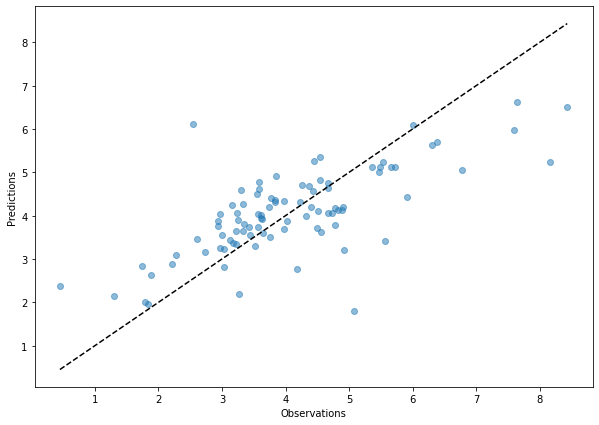

In [4]:
regression_task(LinearRegression(), X_train, y_train, X_test, y_test)

Now we can benchmark some other models against the benchmark model.

XGBoost
MAE score: 0.596
MSE score: 0.683
RMSE score: 0.827
R2 score: 0.66


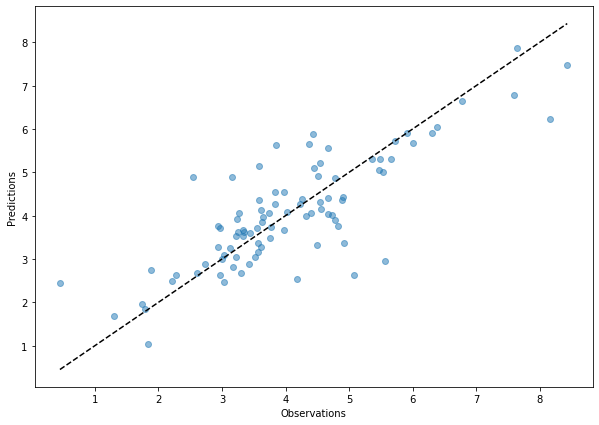

SVR
MAE score: 0.671
MSE score: 0.856
RMSE score: 0.925
R2 score: 0.574


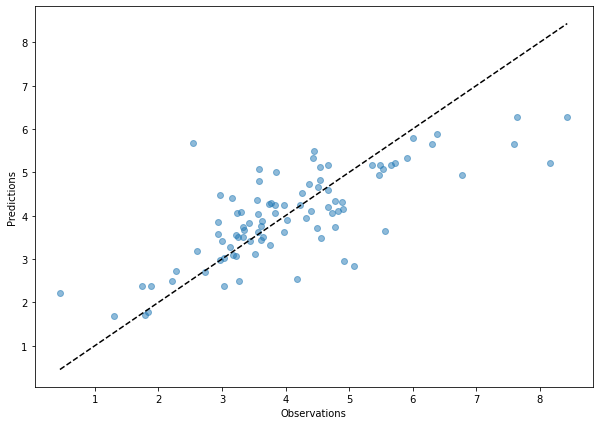

Multi-layer Perceptron
MAE score: 0.68
MSE score: 0.9
RMSE score: 0.949
R2 score: 0.553


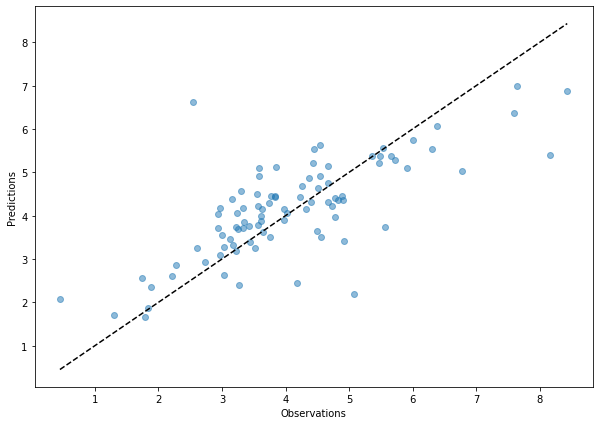

Random Forest
MAE score: 0.817
MSE score: 1.152
RMSE score: 1.073
R2 score: 0.428


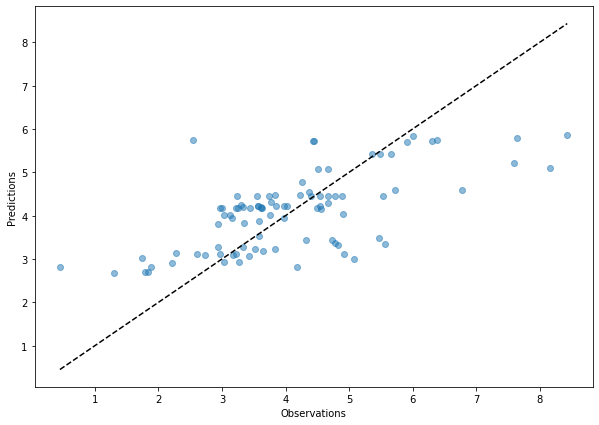

In [5]:
print('XGBoost')
regression_task(XGBRegressor(n_estimators=30, max_depth=10), X_train, y_train, X_test, y_test)

print('SVR')
regression_task(SVR(kernel='rbf'), X_train, y_train, X_test, y_test)

print('Multi-layer Perceptron')
regression_task(MLPRegressor(max_iter=500), X_train, y_train, X_test, y_test)

print('Random Forest')
regression_task(RandomForestRegressor(max_depth=2, random_state=0), X_train, y_train, X_test, y_test)

**Reflect**: How are the models doing?

### We can also use multiple models as an ensemble

In this way, we can select the best performing models and let them 'vote' on each prediction.

MAE score: 0.618
MSE score: 0.739
RMSE score: 0.86
R2 score: 0.633


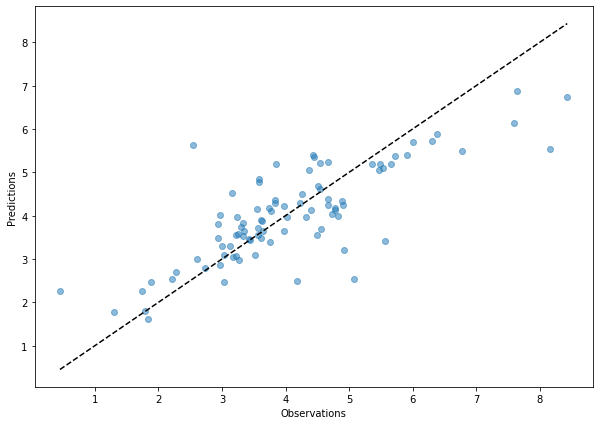

In [6]:
ereg = VotingRegressor(estimators=[('mlp', MLPRegressor(max_iter=500)), ('svr', SVR(kernel='rbf')), ('xgb', XGBRegressor(n_estimators=30, max_depth=10))])
regression_task(ereg, X_train, y_train, X_test, y_test)

**Reflect**: How is the ensemble model performing compared to the others?

## Comparing Regression and Classification approaches

Here, we will compare classification and regression approaches to the wine quality [wine quality dataset](https://archive.ics.uci.edu/dataset/186/wine+quality). Please download the dataset from the given link.
You can read the paper to have a better understanding of the problem and the methods used [here](https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub).

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

red_wine = pd.read_csv('data/wine+quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/wine+quality/winequality-white.csv', sep=';')

In [8]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
X_feature = white_wine.iloc[:, :-1]
y_target = white_wine["quality"].values
print(X_feature.shape, y_target.shape)

X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4898, 11) (4898,)
(3918, 11) (980, 11) (3918,) (980,)


In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score
from numpy import mean, absolute

def prediction(model, approach, X_train, y_train, X_test, y_test):
    mod = model.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    
    if approach == 'regression':
        # The mean squared error
        print("Mean squared error: %.2f" % mean_squared_error(y_test, np.round(y_pred)))
        # The coefficient of determination: 1 is perfect prediction
        print("R2 score: %.2f" % r2_score(y_test, np.round(y_pred)))
        print("MAE: %.2f" % mean_absolute_error(y_test, np.round(y_pred)))

        # Plot outputs
        plt.scatter(y_test, np.round(y_pred), color="black")
        plt.show()
        
    elif approach == 'classification':
        # Accuracy
        print("Accuracy score: %.2f" % accuracy_score(y_test, np.round(y_pred)))
        # F1 score
        print("F1 score: %.2f" % f1_score(y_test, np.round(y_pred), average='weighted'))

        # Plot outputs
        plt.scatter(y_test, np.round(y_pred), color="black")
        plt.show()
        
    else:
        print("Please select an approach between 'regression' and 'classification'.")

Regression approach
Mean squared error: 0.63
R2 score: 0.17
MAE: 0.54


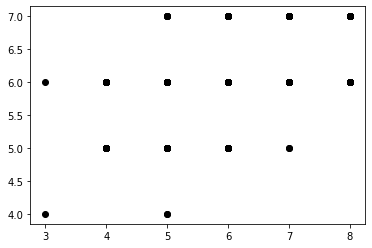

Classification approach
Accuracy score: 0.68
F1 score: 0.67


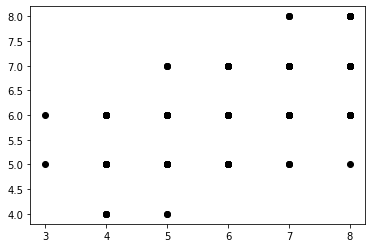

In [11]:
print('Regression approach')
prediction(LinearRegression(), 'regression', X_train, y_train, X_test, y_test)

print('Classification approach')
prediction(RandomForestClassifier(random_state=0), 'classification', X_train, y_train, X_test, y_test)

**Exercise**: Which approach is better for this problem, in your opinion? Feel free to discuss it in your group.

In [12]:
# Explanation here

**Exercise**: Try to use different models to apporach this task. Can you outperform the current results?

In [13]:
# Your code here